# Decision Tree para regresión
- Fuente ejemplo: https://towardsdatascience.com/train-a-regression-model-using-a-decision-tree-70012c22bcc1
- Base de datos: https://towardsdatascience.com/train-a-regression-model-using-a-decision-tree-70012c22bcc1
- Documentación: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
- Objetivo: Predecir precio de casas en California

## 1. Cargar librerías y datos
### Librerías

In [2]:
#Manejo de datos
import pandas as pd
import numpy as np

#Gráficas
import seaborn as sb
import matplotlib.pyplot as plt

#Modelo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Métricas
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import explained_variance_score

### Datos
Popular precios de casas en California

In [3]:
#DataSet de la propia librería
df = pd.read_csv('cali_housing.csv')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 2. Comprensión inicial de los datos
### Datos generales

In [4]:
#Descripción general de los datos
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Revisión gráfica

<AxesSubplot:xlabel='Longitude', ylabel='MedHouseVal'>

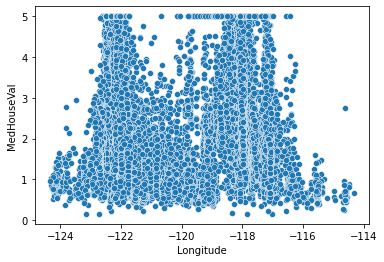

In [5]:
#Gráfica para verificar la relación no lineal
sb.scatterplot(x=df['Longitude'],y=df['MedHouseVal'])

<AxesSubplot:>

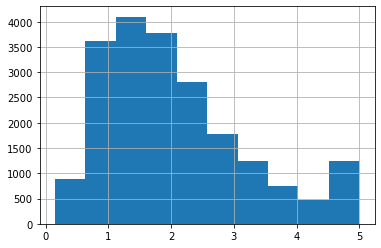

In [6]:
#Histogramas de las variables numéricas
df['MedHouseVal'].hist()

## 3. Peparación de DataFrame

### DataFrame definitivo

In [7]:
#features: variables independientes
X = df.drop(columns=['MedHouseVal'],axis=1)
#primeros 10 valores
print(X.head(10))

#Variable respuesta, dependiente
y = df['MedHouseVal']
#primeros 10 valores
print("\n MedHouseVal")
print(y.head(10))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
5    -122.25  
6    -122.25  
7    -122.25  
8    -122.26  
9    -122.25 

### Train-Test split

In [8]:
#División de datos para training y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("Train shape")
print("X_train:" + str(X_train.shape))
print("y_train:" + str(y_train.shape))
print("Test shape")
print("X_test:" + str(X_test.shape))
print("y_test:" + str(y_test.shape))

Train shape
X_train:(15480, 8)
y_train:(15480,)
Test shape
X_test:(5160, 8)
y_test:(5160,)


In [9]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
19226,7.3003,19.0,7.961600,1.137600,1926.0,3.081600,38.46,-122.68
14549,5.9547,18.0,6.547325,1.102881,547.0,2.251029,32.95,-117.24
9093,3.2125,19.0,5.207547,1.216981,314.0,2.962264,34.68,-118.27
12213,6.9930,13.0,6.428571,1.000000,120.0,2.857143,33.51,-117.18
12765,2.5162,21.0,4.429348,1.036685,1735.0,2.357337,38.62,-121.41


In [10]:
y_train.head()

19226    3.81300
14549    3.29300
9093     1.85400
12213    5.00001
12765    0.97500
Name: MedHouseVal, dtype: float64

## 4. Modelo

### 4.1 Modelo DTR con error cuadrático medio
#### Entrenamiento

In [11]:
#Entrenamiento
dtr1 = DecisionTreeRegressor(criterion='squared_error',max_depth=10,random_state=1)
dtr1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=1)

In [12]:
#Score: Coeficiente de determinación r^2
dtr1.score(X_train, y_train)

0.8369838179078153

In [13]:
#profundidad del árbol
dtr1.get_depth()

10

In [14]:
#leaves: número de hojas del árbol
dtr1.get_n_leaves()

771

In [15]:
#ruta de decision
path = dtr1.decision_path(X_train)
path.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int64)

#### Predicción

In [16]:
#Aplicación del modelo a X_test
predicciones = dtr1.predict(X_test)
predicciones

array([1.51773381, 2.87203191, 1.61436842, ..., 2.13238298, 2.45074684,
       2.70374194])

In [17]:
#Score: Coeficiente de determinación r^2
dtr1.score(X_test, y_test)

0.6739592249626237

#### Tabla de resultados

In [18]:
tabla = pd.DataFrame(X_test).copy()
#Agregar y_verdaderas
tabla['MedHouseVal'] = y_test
#Agregar y de predicción
tabla['MedHouseVal prediction'] = predicciones
tabla['Diferencia'] = tabla['MedHouseVal']-tabla['MedHouseVal prediction']
tabla

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,MedHouseVal prediction,Diferencia
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05,1.369,1.517734,-0.148734
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97,2.413,2.872032,-0.459032
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84,2.007,1.614368,0.392632
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60,0.725,0.768875,-0.043875
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43,4.600,4.802507,-0.202507
...,...,...,...,...,...,...,...,...,...,...,...
13132,4.0516,8.0,6.201299,1.048996,6002.0,3.543093,38.46,-121.48,1.212,1.311098,-0.099098
8228,1.2321,35.0,3.062257,1.173152,820.0,1.595331,33.77,-118.19,1.375,1.717192,-0.342192
3948,3.6296,16.0,3.616842,0.983158,896.0,1.886316,34.20,-118.61,1.609,2.132383,-0.523383
8522,5.5133,37.0,4.593220,0.889831,355.0,3.008475,33.90,-118.34,2.273,2.450747,-0.177747


<AxesSubplot:>

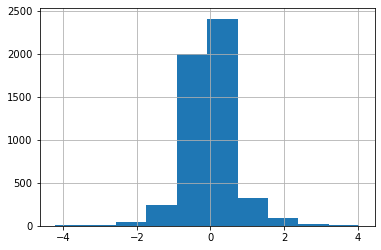

In [19]:
#Distribución de la diferencia
tabla.Diferencia.hist()

### 4.2 Modelo DTR iterando
#### Profundidad
Objetivo: Evitar overfitting en el training

In [31]:
#Entrenamiento
max_depths = range(1, 20)
training_error = []

#ciclo para probar profundidad
for max_depth in max_depths:
    model_1 = DecisionTreeRegressor(max_depth=max_depth)
    model_1.fit(X_train, y_train)
    training_error.append(mse(y_train, model_1.predict(X_train)))

training_error

#Mostrar en tabla
depths_variation = pd.DataFrame(max_depths)
#error cuadrático medio
depths_variation['mse'] = training_error
depths_variation

,0,mse
0,1,0.914070
1,2,0.730066
2,3,0.611198
3,4,0.544094
4,5,0.481805
5,6,0.431889
6,7,0.380695
7,8,0.323426
8,9,0.270649
9,10,0.217569


([<matplotlib.axis.XTick at 0x238ba2e95b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

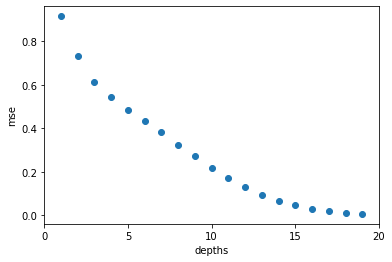

In [32]:
#Gráfica Training
plt.figure()
plt.xlabel('depths')
plt.ylabel('mse')
plt.scatter(max_depths, training_error)
plt.xticks([0,5,10,15,20])

In [22]:
#Testing
max_depths = range(1, 20)
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeRegressor(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_error.append(mse(y_test, model_2.predict(X_test)))
testing_error

depths_variation = pd.DataFrame(max_depths)
#error cuadrático medio
depths_variation['mse'] = testing_error
depths_variation

,0,mse
0,1,0.934134
1,2,0.754810
2,3,0.649530
3,4,0.590176
4,5,0.539441
5,6,0.503431
6,7,0.461432
7,8,0.437999
8,9,0.429110
9,10,0.433748


In [23]:
#Identificar el error mínimo
minimo_error = depths_variation['mse'].min()
depths_variation[depths_variation['mse']==minimo_error]

,0,mse
8,9,0.42911


([<matplotlib.axis.XTick at 0x238ba25a910>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

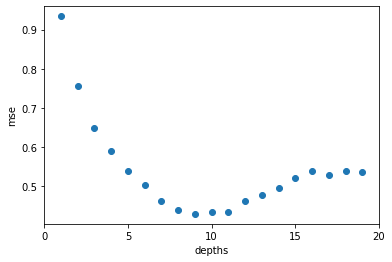

In [24]:
#Gráfica test
plt.figure()
plt.xlabel('depths')
plt.ylabel('mse')
plt.scatter(max_depths, testing_error)
plt.xticks([0,5,10,15,20])

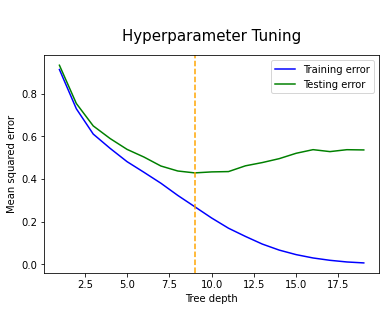

In [34]:
#Gráfica Comparativa
plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=9, color='orange', linestyle='--')
plt.annotate('optimum = 7', xy=(7.5, 1.17), color='red')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()

#### GridSearchCV

In [26]:
#Modelo con GridSearch CrossValidation
model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5, #cross validation
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 9, 'min_samples_split': 50}
0.40858041905832865


In [27]:
#Modelo Entrenamiento
dtr1 = DecisionTreeRegressor(criterion='squared_error',max_depth=10,min_samples_split= 50,random_state=1)
print(dtr1.fit(X_train, y_train))
dtr1.score(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=50, random_state=1)


0.7983990088380482

In [28]:
#Score: Coeficiente de determinación r^2
dtr1.score(X_test, y_test)

0.6940983670773886

### 5. Features importance
Cálculo de la importancia de cada variable en el modelo, ya sea por el índice gini

In [29]:
#Evaluando con gini
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(dtr1.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances

,feature,importance
0,MedInc,0.635
5,AveOccup,0.132
7,Longitude,0.069
6,Latitude,0.067
1,HouseAge,0.044
2,AveRooms,0.032
4,Population,0.013
3,AveBedrms,0.008


In [35]:
#Modelo Entrenamiento
dtr1 = DecisionTreeRegressor(criterion='squared_error',max_depth=10,min_samples_split= 50,random_state=1)
print(dtr1.fit(X_train[['MedInc','AveOccup']], y_train))
dtr1.score(X_train[['MedInc','AveOccup']], y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=50, random_state=1)


0.656693931884746